In [1]:
using Scical

In [2]:
using PyPlot

In [3]:
seed_power = readcsv("Na_seed_power.csv");

In [4]:
currents = seed_power[:, 1];
powers = seed_power[:, 2];

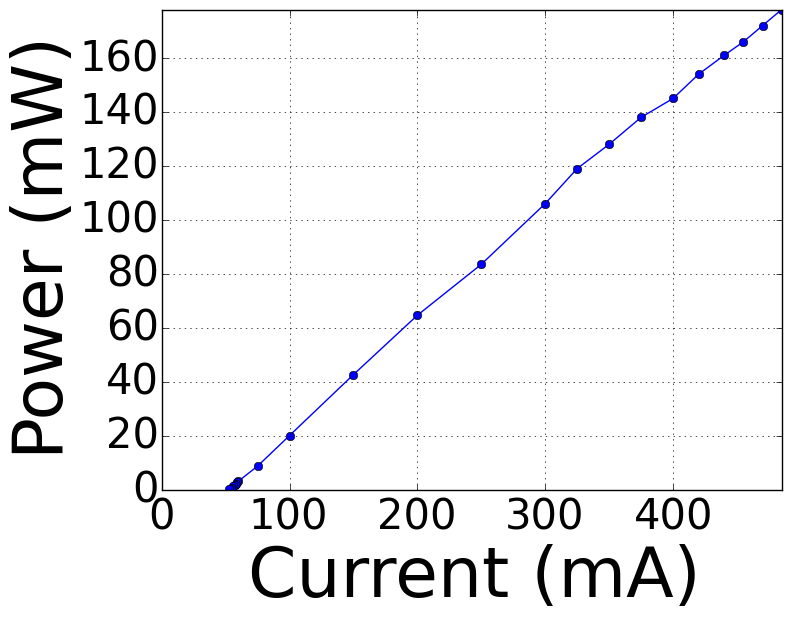

In [5]:
plot(currents, powers, "bo-")
xlim([0, maximum(currents)])
ylim([0, maximum(powers)])
xlabel("Current (mA)"; size=50)
ylabel("Power (mW)"; size=50)
for label in [gca()[:get_xticklabels](); gca()[:get_yticklabels]()]
    label[:set_fontsize](30)
end
grid()
savefig("Na_seed_power.png"; bbox_inches="tight")

In [6]:
doubler_power = readcsv("Na_doubler_power.csv");

In [7]:
dbl_input = doubler_power[:, 1];
dbl_output = doubler_power[:, 2];

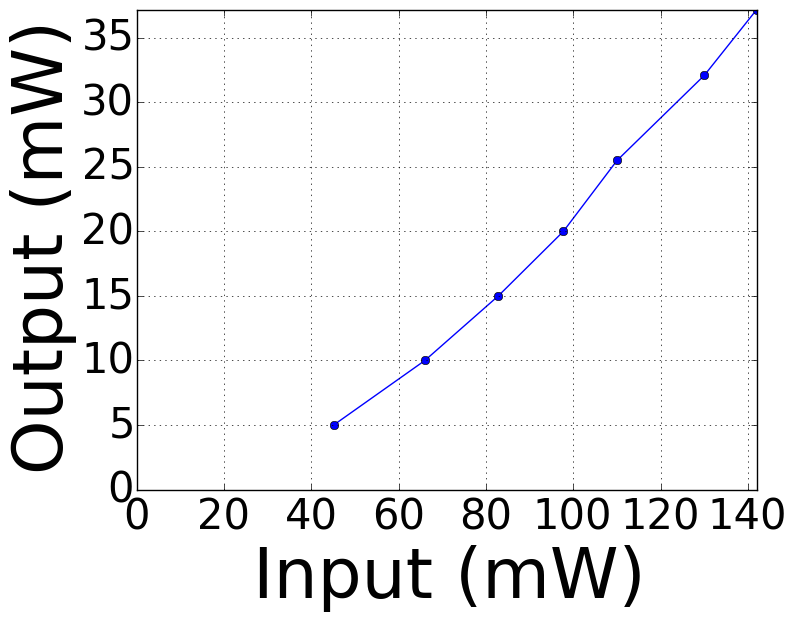

In [8]:
plot(dbl_input, dbl_output, "bo-")
xlim([0, maximum(dbl_input)])
ylim([0, maximum(dbl_output)])
xlabel("Input (mW)"; size=50)
ylabel("Output (mW)"; size=50)
for label in [gca()[:get_xticklabels](); gca()[:get_yticklabels]()]
    label[:set_fontsize](30)
end
grid()
savefig("Na_doubler_power.png"; bbox_inches="tight")